In [57]:
import pandas as pd

In [58]:
master_frame = pd.read_csv("master_frame.csv")

In [59]:
master_frame.shape

(94958, 15)

In [60]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
dtype: int64

In [61]:
venturefundings = master_frame[master_frame.funding_round_type == "venture"]

In [62]:
venturefundings.shape

(50228, 15)

In [63]:
venturefundings

permalink  \
0                                    /organization/-fame   
2                    /organization/-the-one-of-them-inc-   
3                                  /organization/0-6-com   
6                    /organization/0ndine-biomedical-inc   
8                                   /organization/0xdata   
...                                                  ...   
94941                     /organization/zyraz-technology   
94944                                /organization/zyrra   
94946                               /organization/zystor   
94947                           /organization/zytoprotec   
94951  /organization/zznode-science-and-technology-co...   

                                name               homepage_url  \
0                              #fame         http://livfame.com   
2             (THE) ONE of THEM,Inc.        http://oneofthem.jp   
3                            0-6.com         http://www.0-6.com   
6             Ondine Biomedical Inc.       http://ondinebio.com   
8                             H2O.ai             http://h2o.ai/   
...                              ...                        ...   
94941               Zyraz Technology       http://www.zyraz.com   
94944                          Zyrra       http://www.zyrra.com   
94946                         Zystor      http://www.zystor.com   
94947                     Zytoprotec  http://www.zytoprotec.com   
94951  ZZNode Science and Technology      http://www.zznode.com   

             category_list     status country_code state_code       region  \
0                    Media  operating          IND         16       Mumbai   
2        Apps|Games|Mobile  operating          NaN        NaN          NaN   
3              Curated Web  operating          CHN         22      Beijing   
6            Biotechnology  operating          CAN         BC    Vancouver   
8                Analytics  operating          USA         CA  SF Bay Area   
...                    ...        ...          ...        ...          ...   
94941        Biotechnology     closed          MYS         14  MYS - Other   
94944           E-Commerce  operating          USA         MA       Boston   
94946        Biotechnology   acquired          USA         WI    Milwaukee   
94947        Biotechnology  operating          AUT          3       Vienna   
94951  Enterprise Software  operating          CHN         22      Beijing   

                        city  founded_at  \
0                     Mumbai         NaN   
2                        NaN         NaN   
3                    Beijing  01-01-2007   
6                  Vancouver  01-01-1997   
8              Mountain View  01-01-2011   
...                      ...         ...   
94941  Damansara New Village  01-01-1994   
94944              Cambridge         NaN   
94946              Milwaukee         NaN   
94947     Gerasdorf Bei Wien  01-01-2007   
94951                Beijing         NaN   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2      /funding-round/650b8f704416801069bb178a1418776b            venture   
3      /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6      /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   
8      /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
...                                                ...                ...   
94941  /funding-round/e949f077c943db197f20e43c2eb8d0e6            venture   
94944  /funding-round/7a0fa791c96c9c447ee54662395beab9            venture   
94946  /funding-round/7ea37c0ff4132b084832039a9380d34e            venture   
94947  /funding-round/0c43e717298296d2fb334fb236300f6e            venture   
94951  /funding-round/171693e1e07e0230defd8fddb6de4515            venture   

      funding_round_code   funded_at  raised_amount_usd  
0                      B  05-01-2015         10000000.0  
2             

In [64]:
venturefundings.isnull().sum()

permalink                      0
name                           0
homepage_url                2608
category_list                502
status                         0
country_code                2117
state_code                  2861
region                      2713
city                        2713
founded_at                  9631
funding_round_permalink        0
funding_round_type             0
funding_round_code         22185
funded_at                      0
raised_amount_usd              0
dtype: int64

In [65]:
venturefundings = venturefundings[~venturefundings.country_code.isnull()]

In [66]:
venturefundings.shape

(48111, 15)

In [67]:
venturefundings.isnull().sum()

permalink                      0
name                           0
homepage_url                2175
category_list                302
status                         0
country_code                   0
state_code                   744
region                       596
city                         596
founded_at                  8551
funding_round_permalink        0
funding_round_type             0
funding_round_code         21294
funded_at                      0
raised_amount_usd              0
dtype: int64

In [68]:
venturefundingsByCountry = venturefundings.groupby("country_code")

In [69]:
countries = venturefundingsByCountry.raised_amount_usd.sum().sort_values(ascending=False)

In [70]:
countries

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

In [71]:
top9countries = countries[:9]

In [72]:
top9countries.keys()

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

In [73]:
venturefundings = venturefundings[venturefundings.country_code.isin(top9countries.keys())]

In [74]:
top9 = venturefundings

In [75]:
top9

permalink  \
0                                    /organization/-fame   
3                                  /organization/0-6-com   
6                    /organization/0ndine-biomedical-inc   
8                                   /organization/0xdata   
9                                   /organization/0xdata   
...                                                  ...   
94933                           /organization/zyomyx-inc   
94934                           /organization/zyomyx-inc   
94944                                /organization/zyrra   
94946                               /organization/zystor   
94951  /organization/zznode-science-and-technology-co...   

                                name           homepage_url  \
0                              #fame     http://livfame.com   
3                            0-6.com     http://www.0-6.com   
6             Ondine Biomedical Inc.   http://ondinebio.com   
8                             H2O.ai         http://h2o.ai/   
9                             H2O.ai         http://h2o.ai/   
...                              ...                    ...   
94933                         ZYOMYX  http://www.zyomyx.com   
94934                         ZYOMYX  http://www.zyomyx.com   
94944                          Zyrra   http://www.zyrra.com   
94946                         Zystor  http://www.zystor.com   
94951  ZZNode Science and Technology  http://www.zznode.com   

             category_list     status country_code state_code       region  \
0                    Media  operating          IND         16       Mumbai   
3              Curated Web  operating          CHN         22      Beijing   
6            Biotechnology  operating          CAN         BC    Vancouver   
8                Analytics  operating          USA         CA  SF Bay Area   
9                Analytics  operating          USA         CA  SF Bay Area   
...                    ...        ...          ...        ...          ...   
94933        Biotechnology  operating          USA         MO   MO - Other   
94934        Biotechnology  operating          USA         MO   MO - Other   
94944           E-Commerce  operating          USA         MA       Boston   
94946        Biotechnology   acquired          USA         WI    Milwaukee   
94951  Enterprise Software  operating          CHN         22      Beijing   

                city  founded_at  \
0             Mumbai         NaN   
3            Beijing  01-01-2007   
6          Vancouver  01-01-1997   
8      Mountain View  01-01-2011   
9      Mountain View  01-01-2011   
...              ...         ...   
94933        Fremont  01-01-1998   
94934        Fremont  01-01-1998   
94944      Cambridge         NaN   
94946      Milwaukee         NaN   
94951        Beijing         NaN   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
3      /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6      /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   
8      /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
9      /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
...                                                ...                ...   
94933  /funding-round/b4fce7f8a13267353d57db09099800e8            venture   
94934  /funding-round/ea5b21da6cf999ff4d5667431fe318d7            venture   
94944  /funding-round/7a0fa791c96c9c447ee54662395beab9            venture   
94946  /funding-round/7ea37c0ff4132b084832039a9380d34e            venture   
94951  /funding-round/171693e1e07e0230defd8fddb6de4515            venture   

      funding_round_code   funded_at  raised_amount_usd  
0                      B  05-01-2015         10000000.0  
3                      A  19-03-2008          2000000.0  
6                    NaN  21-12-2009           719491.0  
8                      B  09-11-2015      

In [76]:
top9.to_csv("top9.csv", index=False)

In [77]:
top9

permalink  \
0                                    /organization/-fame   
3                                  /organization/0-6-com   
6                    /organization/0ndine-biomedical-inc   
8                                   /organization/0xdata   
9                                   /organization/0xdata   
...                                                  ...   
94933                           /organization/zyomyx-inc   
94934                           /organization/zyomyx-inc   
94944                                /organization/zyrra   
94946                               /organization/zystor   
94951  /organization/zznode-science-and-technology-co...   

                                name           homepage_url  \
0                              #fame     http://livfame.com   
3                            0-6.com     http://www.0-6.com   
6             Ondine Biomedical Inc.   http://ondinebio.com   
8                             H2O.ai         http://h2o.ai/   
9                             H2O.ai         http://h2o.ai/   
...                              ...                    ...   
94933                         ZYOMYX  http://www.zyomyx.com   
94934                         ZYOMYX  http://www.zyomyx.com   
94944                          Zyrra   http://www.zyrra.com   
94946                         Zystor  http://www.zystor.com   
94951  ZZNode Science and Technology  http://www.zznode.com   

             category_list     status country_code state_code       region  \
0                    Media  operating          IND         16       Mumbai   
3              Curated Web  operating          CHN         22      Beijing   
6            Biotechnology  operating          CAN         BC    Vancouver   
8                Analytics  operating          USA         CA  SF Bay Area   
9                Analytics  operating          USA         CA  SF Bay Area   
...                    ...        ...          ...        ...          ...   
94933        Biotechnology  operating          USA         MO   MO - Other   
94934        Biotechnology  operating          USA         MO   MO - Other   
94944           E-Commerce  operating          USA         MA       Boston   
94946        Biotechnology   acquired          USA         WI    Milwaukee   
94951  Enterprise Software  operating          CHN         22      Beijing   

                city  founded_at  \
0             Mumbai         NaN   
3            Beijing  01-01-2007   
6          Vancouver  01-01-1997   
8      Mountain View  01-01-2011   
9      Mountain View  01-01-2011   
...              ...         ...   
94933        Fremont  01-01-1998   
94934        Fremont  01-01-1998   
94944      Cambridge         NaN   
94946      Milwaukee         NaN   
94951        Beijing         NaN   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
3      /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6      /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   
8      /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
9      /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
...                                                ...                ...   
94933  /funding-round/b4fce7f8a13267353d57db09099800e8            venture   
94934  /funding-round/ea5b21da6cf999ff4d5667431fe318d7            venture   
94944  /funding-round/7a0fa791c96c9c447ee54662395beab9            venture   
94946  /funding-round/7ea37c0ff4132b084832039a9380d34e            venture   
94951  /funding-round/171693e1e07e0230defd8fddb6de4515            venture   

      funding_round_code   funded_at  raised_amount_usd  
0                      B  05-01-2015         10000000.0  
3                      A  19-03-2008          2000000.0  
6                    NaN  21-12-2009           719491.0  
8                      B  09-11-2015      

In [78]:
top9byCountry = top9.groupby("country_code")

In [79]:
df = top9byCountry.raised_amount_usd.sum().sort_values(ascending=False)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

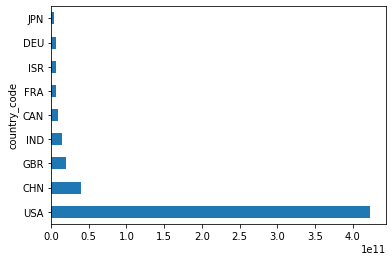

In [81]:
df.plot.barh()

In [82]:
top3 = top9[top9.country_code.isin(['USA', 'GBR', 'IND'])]

In [83]:
top3.shape

(39018, 15)

In [84]:
top3.country_code.value_counts()

USA    36139
GBR     2055
IND      824
Name: country_code, dtype: int64

In [85]:
top3.to_csv("top3.csv", index=False)